In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from datetime import datetime

# 1. Data Collection

In [2]:
now = datetime.now()

start = datetime(now.year - 10, now.month, now.day)
end = now
ticker = 'AAPL'
df = yf.download(ticker, start, end)
df

C:\Users\seiit\AppData\Local\Temp\ipykernel_24448\152584755.py:6: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start, end)
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2015-12-22,24.177036,24.287516,24.001169,24.215366,131157600
2015-12-23,24.488176,24.542288,24.170264,24.186047,130629600
2015-12-24,24.357410,24.576116,24.339373,24.576116,54281600
2015-12-28,24.084593,24.280751,23.940293,24.258203,106816800
2015-12-29,24.517492,24.673066,24.093611,24.116158,123724800
...,...,...,...,...,...
2025-12-16,274.609985,275.500000,271.790009,272.820007,37648600
2025-12-17,271.839996,276.160004,271.640015,275.010010,50138700


# 2. Data Exploration and Visualisation

In [3]:
type(df)

pandas.core.frame.DataFrame

In [4]:
df.shape

(2515, 5)

In [5]:
df.isna().sum()

Price   Ticker
Close   AAPL      0
High    AAPL      0
Low     AAPL      0
Open    AAPL      0
Volume  AAPL      0
dtype: int64

In [6]:
df.describe()

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
count,2515.000000,2515.000000,2515.000000,2515.000000,2.515000e+03
mean,113.662721,114.792152,112.418148,113.554098,1.019898e+08
std,73.077819,73.777064,72.301483,73.004771,5.788286e+07
min,20.604078,20.907414,20.405656,20.526533,5.557456e+06
25%,41.426714,41.690328,41.009481,41.353777,6.205520e+07
50%,119.465103,121.122442,117.787736,119.738083,8.900160e+07
75%,171.442535,172.616788,169.555512,171.180262,1.246412e+08
max,286.190002,288.619995,283.299988,286.200012,5.334788e+08


In [7]:
df.dtypes

Price   Ticker
Close   AAPL      float64
High    AAPL      float64
Low     AAPL      float64
Open    AAPL      float64
Volume  AAPL        int64
dtype: object

In [8]:
df.head()

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2015-12-22,24.177036,24.287516,24.001169,24.215366,131157600
2015-12-23,24.488176,24.542288,24.170264,24.186047,130629600
2015-12-24,24.357410,24.576116,24.339373,24.576116,54281600
2015-12-28,24.084593,24.280751,23.940293,24.258203,106816800
2015-12-29,24.517492,24.673066,24.093611,24.116158,123724800


In [9]:
df = df.reset_index()

In [10]:
df

Price,Date,Close,High,Low,Open,Volume
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL
0,2015-12-22,24.177036,24.287516,24.001169,24.215366,131157600
1,2015-12-23,24.488176,24.542288,24.170264,24.186047,130629600
2,2015-12-24,24.357410,24.576116,24.339373,24.576116,54281600
3,2015-12-28,24.084593,24.280751,23.940293,24.258203,106816800
4,2015-12-29,24.517492,24.673066,24.093611,24.116158,123724800
...,...,...,...,...,...,...
2510,2025-12-16,274.609985,275.500000,271.790009,272.820007,37648600
2511,2025-12-17,271.839996,276.160004,271.640015,275.010010,50138700
2512,2025-12-18,272.190002,273.630005,266.950012,273.609985,51630700


Text(0.5, 0, 'Days')

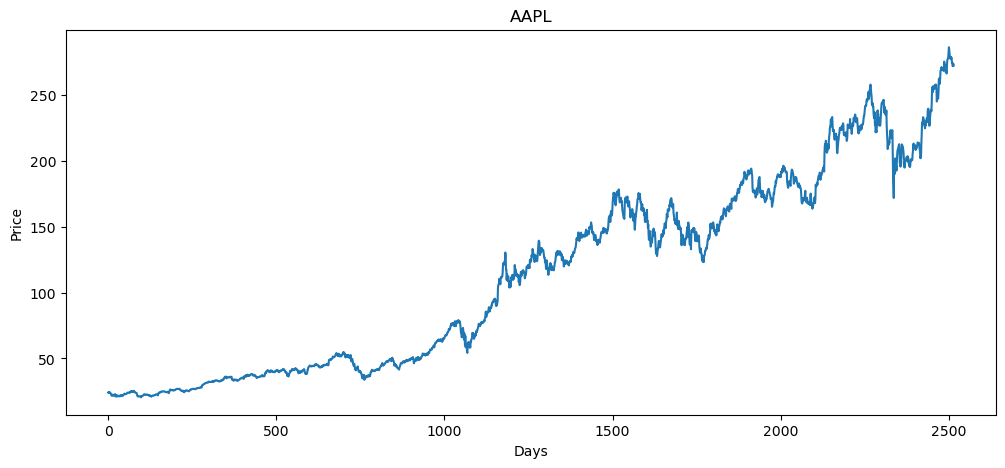

In [11]:
plt.figure(figsize=(12,5))
plt.plot(df.Close)
plt.title(ticker)
plt.ylabel("Price")
plt.xlabel("Days")

# 3. Feature Engineering

In [12]:
# 10, 20, 30, 40, 50, 60, 70, 80, 90, 100

# MA(moving average) of 5 days ==> null null null null 30 40

In [13]:
temp_df = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
print(sum(temp_df[1:6])/5)

40.0


In [14]:
df1 = pd.DataFrame([10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
df1

,0
0,10
1,20
2,30
3,40
4,50
5,60
6,70
7,80
8,90
9,100


In [15]:
df1["MA_5"] = df1.rolling(5).mean()
df1

,0,MA_5
0,10,NaN
1,20,NaN
2,30,NaN
3,40,NaN
4,50,30.0
5,60,40.0
6,70,50.0
7,80,60.0
8,90,70.0
9,100,80.0


# 100 Days Moving Average

In [16]:
df['MA_100'] = df.Close.rolling(100).mean()
df.head(103)

Price,Date,Close,High,Low,Open,Volume,MA_100
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL,
0,2015-12-22,24.177036,24.287516,24.001169,24.215366,131157600,NaN
1,2015-12-23,24.488176,24.542288,24.170264,24.186047,130629600,NaN
2,2015-12-24,24.357410,24.576116,24.339373,24.576116,54281600,NaN
3,2015-12-28,24.084593,24.280751,23.940293,24.258203,106816800,NaN
4,2015-12-29,24.517492,24.673066,24.093611,24.116158,123724800,NaN
...,...,...,...,...,...,...,...
98,2016-05-13,20.645130,20.907414,20.526533,20.526533,177571200,NaN
99,2016-05-16,21.411455,21.527773,20.902854,21.071627,245039200,22.859026
100,2016-05-17,21.322504,21.598472,21.213030,21.564262,187667600,22.830480


Text(0.5, 0, 'Days')

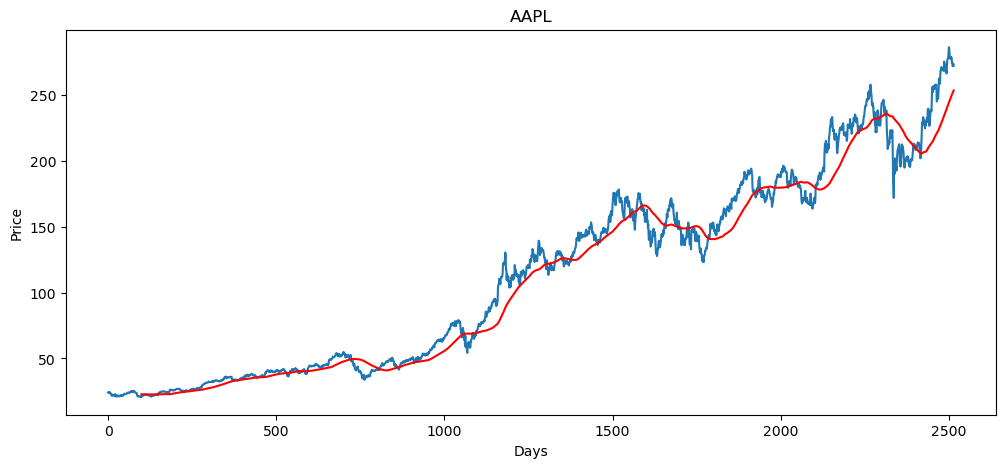

In [17]:
plt.figure(figsize=(12,5))
plt.plot(df.Close)
plt.plot(df["MA_100"], 'r')
plt.title(ticker)
plt.ylabel("Price")
plt.xlabel("Days")

# 200 Days Moving Average

In [18]:
df['MA_200'] = df.Close.rolling(200).mean()
df.head(203)

Price,Date,Close,High,Low,Open,Volume,MA_100,MA_200
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL,,
0,2015-12-22,24.177036,24.287516,24.001169,24.215366,131157600,NaN,NaN
1,2015-12-23,24.488176,24.542288,24.170264,24.186047,130629600,NaN,NaN
2,2015-12-24,24.357410,24.576116,24.339373,24.576116,54281600,NaN,NaN
3,2015-12-28,24.084593,24.280751,23.940293,24.258203,106816800,NaN,NaN
4,2015-12-29,24.517492,24.673066,24.093611,24.116158,123724800,NaN,NaN
...,...,...,...,...,...,...,...,...
198,2016-10-05,25.923279,26.063157,25.840728,26.003536,85812400,23.563904,NaN
199,2016-10-06,26.115900,26.219088,25.941625,26.072331,115117200,23.610949,23.234987
200,2016-10-07,26.154877,26.269531,26.028758,26.212204,97433600,23.659272,23.244876


Text(0.5, 0, 'Days')

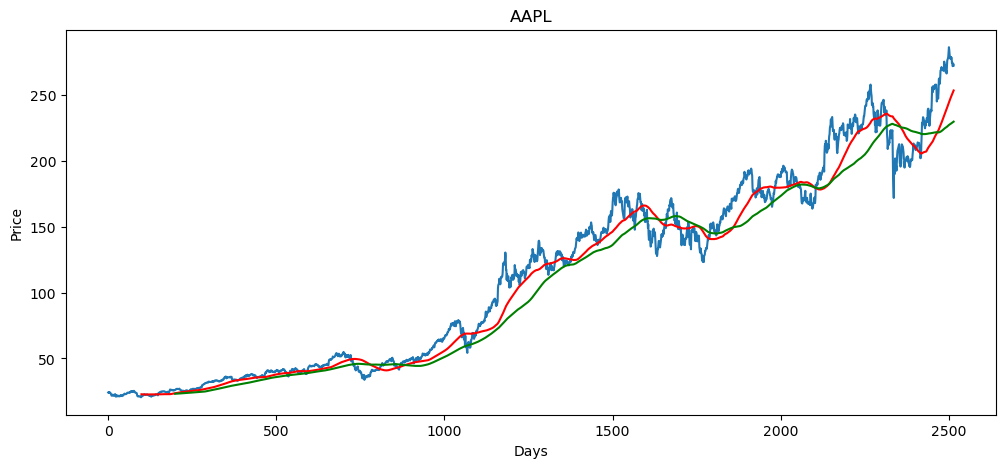

In [19]:
plt.figure(figsize=(12,5))
plt.plot(df.Close)
plt.plot(df["MA_100"], 'r')
plt.plot(df["MA_200"], 'g')
plt.title(ticker)
plt.ylabel("Price")
plt.xlabel("Days")

In [20]:
df

Price,Date,Close,High,Low,Open,Volume,MA_100,MA_200
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL,,
0,2015-12-22,24.177036,24.287516,24.001169,24.215366,131157600,NaN,NaN
1,2015-12-23,24.488176,24.542288,24.170264,24.186047,130629600,NaN,NaN
2,2015-12-24,24.357410,24.576116,24.339373,24.576116,54281600,NaN,NaN
3,2015-12-28,24.084593,24.280751,23.940293,24.258203,106816800,NaN,NaN
4,2015-12-29,24.517492,24.673066,24.093611,24.116158,123724800,NaN,NaN
...,...,...,...,...,...,...,...,...
2510,2025-12-16,274.609985,275.500000,271.790009,272.820007,37648600,250.860325,228.975506
2511,2025-12-17,271.839996,276.160004,271.640015,275.010010,50138700,251.442722,229.159076
2512,2025-12-18,272.190002,273.630005,266.950012,273.609985,51630700,252.056360,229.345343


In [21]:
df['Percentage Changed'] = df.Close.pct_change()
df[['Close', 'Percentage Changed']]

Price,Close,Percentage Changed
Ticker,AAPL,
0,24.177036,NaN
1,24.488176,0.012869
2,24.357410,-0.005340
3,24.084593,-0.011201
4,24.517492,0.017974
...,...,...
2510,274.609985,0.001824
2511,271.839996,-0.010087
2512,272.190002,0.001288


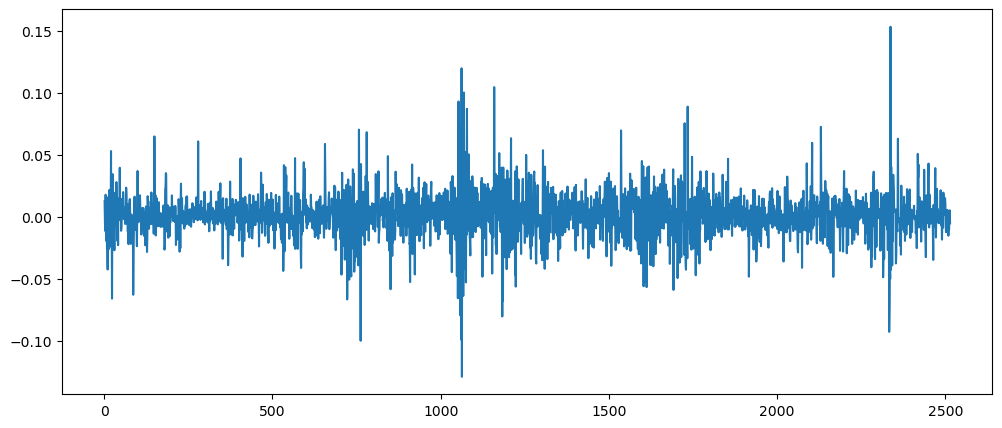

In [22]:
plt.figure(figsize=(12, 5))
plt.plot(df["Percentage Changed"])

# 4. Data Preprocessing

In [23]:
df.shape

(2515, 9)

In [24]:
# Splitting data into Training and Testing datasets
data_training = pd.DataFrame(df.Close[0:int(len(df)*0.7)])
data_testing = pd.DataFrame(df.Close[int(len(df)*0.7) : int(len(df))])

print(data_training)

Ticker        AAPL
0        24.177036
1        24.488176
2        24.357410
3        24.084593
4        24.517492
...            ...
1755    142.342590
1756    143.308014
1757    141.081635
1758    134.471313
1759    132.510895

[1760 rows x 1 columns]


In [25]:
print(data_testing)

Ticker        AAPL
1760    130.402679
1761    130.333740
1762    133.436966
1763    130.264801
1764    129.900284
...            ...
2510    274.609985
2511    271.839996
2512    272.190002
2513    273.670013
2514    272.279999

[755 rows x 1 columns]


In [26]:
data_training

Ticker,AAPL
0,24.177036
1,24.488176
2,24.357410
3,24.084593
4,24.517492
...,...
1755,142.342590
1756,143.308014
1757,141.081635
1758,134.471313


In [27]:
data_testing

Ticker,AAPL
1760,130.402679
1761,130.333740
1762,133.436966
1763,130.264801
1764,129.900284
...,...
2510,274.609985
2511,271.839996
2512,272.190002
2513,273.670013


# Scaling down the data between 0 and 1

In [28]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [29]:
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.02266153],
       [0.02463494],
       [0.02380556],
       ...,
       [0.76413045],
       [0.7222044 ],
       [0.70977042]], shape=(1760, 1))

# 5. Sequence Creation

In [30]:
# Tomorrow's stock price, will depent on previous stock price

# x_train                                   y_train
# 12, 15, 10, 14, 16, 18, 19, 20, 21, 20     22

In [31]:
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i, 0])

x_train,  y_train = np.array(x_train), np.array(y_train) 

In [32]:
x_train

array([[[2.26615320e-02],
        [2.46349418e-02],
        [2.38055573e-02],
        ...,
        [0.00000000e+00],
        [2.60371979e-04],
        [5.12079812e-03]],

       [[2.46349418e-02],
        [2.38055573e-02],
        [2.20752081e-02],
        ...,
        [2.60371979e-04],
        [5.12079812e-03],
        [4.55662455e-03]],

       [[2.38055573e-02],
        [2.20752081e-02],
        [2.48208786e-02],
        ...,
        [5.12079812e-03],
        [4.55662455e-03],
        [6.10448474e-03]],

       ...,

       [[8.22082043e-01],
        [8.13672620e-01],
        [8.46002441e-01],
        ...,
        [7.57569505e-01],
        [7.72128077e-01],
        [7.78251288e-01]],

       [[8.13672620e-01],
        [8.46002441e-01],
        [8.49490842e-01],
        ...,
        [7.72128077e-01],
        [7.78251288e-01],
        [7.64130448e-01]],

       [[8.46002441e-01],
        [8.49490842e-01],
        [8.81633783e-01],
        ...,
        [7.78251288e-01],
        [7.6413

In [33]:
y_train

array([0.00455662, 0.00610448, 0.00558373, ..., 0.76413045, 0.7222044 ,
       0.70977042], shape=(1660,))

In [34]:
x_train.ndim

3

In [35]:
y_train.ndim

1

# 6. Model Building

In [36]:
import tensorflow as tf
print(tf.__version__)

2.20.0


In [37]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Input

In [38]:
model = Sequential()

model.add(Input(shape=(100, 1)))
model.add(LSTM(units=128, activation="tanh", return_sequences=True))
model.add(LSTM(units=64))
model.add(Dense(25))
model.add(Dense(1))

# 7. Model Training

In [40]:
# model.compile(optimizer='adam', loss='mean_squared_error')
# model.fit(x_train, y_train, epochs=50)

In [ ]:
# model.summary()

In [ ]:
# model.save('stock_prediction_mode.keras')

# 8. Preparing Test Data

In [41]:
data_testing

Ticker,AAPL
1760,130.402679
1761,130.333740
1762,133.436966
1763,130.264801
1764,129.900284
...,...
2510,274.609985
2511,271.839996
2512,272.190002
2513,273.670013


In [42]:
past_100_days = data_training.tail(100)

In [43]:
past_100_days

Ticker,AAPL
1660,154.540085
1661,159.607941
1662,158.625793
1663,157.152618
1664,163.163315
...,...
1755,142.342590
1756,143.308014
1757,141.081635
1758,134.471313


In [44]:
final_df = pd.concat([past_100_days, data_testing], ignore_index=True)
final_df

Ticker,AAPL
0,154.540085
1,159.607941
2,158.625793
3,157.152618
4,163.163315
...,...
850,274.609985
851,271.839996
852,272.190002
853,273.670013


In [45]:
input_data = scaler.fit_transform(final_df)
input_data

array([[1.92470812e-01],
       [2.23556601e-01],
       [2.17532195e-01],
       [2.08495867e-01],
       [2.45364958e-01],
       [2.43436972e-01],
       [2.42049691e-01],
       [2.39153734e-01],
       [2.39455301e-01],
       [2.65517038e-01],
       [2.60992416e-01],
       [2.82770448e-01],
       [2.89346135e-01],
       [2.88380972e-01],
       [2.97550862e-01],
       [2.95137487e-01],
       [2.79271545e-01],
       [2.55442074e-01],
       [2.53391010e-01],
       [2.55200784e-01],
       [2.70282764e-01],
       [2.31612884e-01],
       [2.18099481e-01],
       [2.03198515e-01],
       [1.93003187e-01],
       [1.97467440e-01],
       [1.84496987e-01],
       [1.76775310e-01],
       [1.85401968e-01],
       [1.76352723e-01],
       [1.93908074e-01],
       [2.30466613e-01],
       [1.72612623e-01],
       [1.81480759e-01],
       [1.63744394e-01],
       [1.53669898e-01],
       [1.76473462e-01],
       [1.91072767e-01],
       [1.71888658e-01],
       [1.65976567e-01],


In [46]:
input_data.shape

(855, 1)

In [47]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100 : i])
    y_test.append(input_data[i, 0])

In [48]:
x_test, y_test = np.array(x_test), np.array(y_test)

In [49]:
y_test

array([4.44140590e-02, 4.39911919e-02, 6.30261095e-02, 4.35683247e-02,
       4.13324077e-02, 3.02741233e-02, 6.16367691e-03, 2.77363121e-02,
       2.96699137e-02, 3.02174977e-04, 8.09737213e-03, 0.00000000e+00,
       2.77966816e-02, 3.09993994e-02, 3.45041986e-02, 5.11820859e-02,
       5.06987556e-02, 5.88563101e-02, 6.59870218e-02, 6.15758381e-02,
       6.19383357e-02, 7.76494690e-02, 9.72278991e-02, 1.05808695e-01,
       1.01760009e-01, 1.14449767e-01, 1.26353879e-01, 1.08648868e-01,
       1.16443832e-01, 1.23332504e-01, 1.55902914e-01, 1.78140221e-01,
       1.61401777e-01, 1.79046793e-01, 1.62549921e-01, 1.56205042e-01,
       1.58444422e-01, 1.75632033e-01, 1.71698283e-01, 1.84588992e-01,
       1.74784708e-01, 1.67764533e-01, 1.43132757e-01, 1.45735383e-01,
       1.48700694e-01, 1.32421058e-01, 1.39743829e-01, 1.36657311e-01,
       1.23948179e-01, 1.27579426e-01, 1.58565348e-01, 1.75511107e-01,
       1.62015206e-01, 1.69701130e-01, 1.55902446e-01, 1.43254151e-01,
      

# 9. Making Predictions

In [50]:
y_predicted = model.predict(x_test)

24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step


In [51]:
y_predicted

array([[0.10034124],
       [0.08951851],
       [0.07838145],
       [0.07037824],
       [0.06300184],
       [0.05654772],
       [0.05013929],
       [0.04185995],
       [0.03562994],
       [0.03150113],
       [0.02594603],
       [0.02090274],
       [0.01584412],
       [0.01419515],
       [0.01511722],
       [0.01782353],
       [0.02304756],
       [0.02915944],
       [0.03598221],
       [0.04324012],
       [0.04946729],
       [0.05440667],
       [0.05973969],
       [0.06688391],
       [0.07528623],
       [0.08305307],
       [0.09098967],
       [0.09948523],
       [0.10534701],
       [0.10987566],
       [0.11389472],
       [0.12090652],
       [0.13149051],
       [0.14105116],
       [0.15099835],
       [0.15807204],
       [0.16191152],
       [0.16369493],
       [0.16612007],
       [0.16818556],
       [0.17136572],
       [0.1736759 ],
       [0.17441283],
       [0.1712636 ],
       [0.16659053],
       [0.16194828],
       [0.15599659],
       [0.150

In [52]:
y_test

array([4.44140590e-02, 4.39911919e-02, 6.30261095e-02, 4.35683247e-02,
       4.13324077e-02, 3.02741233e-02, 6.16367691e-03, 2.77363121e-02,
       2.96699137e-02, 3.02174977e-04, 8.09737213e-03, 0.00000000e+00,
       2.77966816e-02, 3.09993994e-02, 3.45041986e-02, 5.11820859e-02,
       5.06987556e-02, 5.88563101e-02, 6.59870218e-02, 6.15758381e-02,
       6.19383357e-02, 7.76494690e-02, 9.72278991e-02, 1.05808695e-01,
       1.01760009e-01, 1.14449767e-01, 1.26353879e-01, 1.08648868e-01,
       1.16443832e-01, 1.23332504e-01, 1.55902914e-01, 1.78140221e-01,
       1.61401777e-01, 1.79046793e-01, 1.62549921e-01, 1.56205042e-01,
       1.58444422e-01, 1.75632033e-01, 1.71698283e-01, 1.84588992e-01,
       1.74784708e-01, 1.67764533e-01, 1.43132757e-01, 1.45735383e-01,
       1.48700694e-01, 1.32421058e-01, 1.39743829e-01, 1.36657311e-01,
       1.23948179e-01, 1.27579426e-01, 1.58565348e-01, 1.75511107e-01,
       1.62015206e-01, 1.69701130e-01, 1.55902446e-01, 1.43254151e-01,
      

In [53]:
y_predicted = scaler.inverse_transform(y_predicted.reshape(-1, 1)).flatten()
y_test = scaler.inverse_transform(y_test.reshape(-1, 1)).flatten()

In [54]:
y_predicted

array([139.52039, 137.75597, 135.94032, 134.63557, 133.43301, 132.3808 ,
       131.33606, 129.98628, 128.97061, 128.2975 , 127.39187, 126.56968,
       125.74497, 125.47615, 125.62647, 126.06767, 126.91934, 127.91575,
       129.02805, 130.21129, 131.2265 , 132.03175, 132.90118, 134.0659 ,
       135.4357 , 136.70192, 137.9958 , 139.38083, 140.33647, 141.07475,
       141.72998, 142.8731 , 144.59859, 146.15724, 147.77892, 148.93211,
       149.55806, 149.8488 , 150.24417, 150.58092, 151.09937, 151.47598,
       151.59613, 151.08272, 150.32086, 149.56406, 148.59377, 147.7585 ,
       147.04312, 146.24579, 145.56502, 145.61281, 146.40402, 147.28911,
       148.27565, 148.94214, 149.10258, 149.17686, 149.43558, 149.81805,
       150.5622 , 151.33041, 152.30579, 153.5078 , 154.5274 , 155.4523 ,
       156.36783, 156.93121, 157.15044, 157.51852, 158.11671, 159.08499,
       160.3066 , 161.46387, 162.21727, 162.75977, 162.79039, 162.37941,
       161.68318, 161.57393, 161.76712, 162.12111, 

In [55]:
y_test

array([130.40267944, 130.33374023, 133.43696594, 130.26480103,
       129.90028381, 128.09747314, 124.16679382, 127.68373871,
       127.99897003, 123.21120453, 124.48204041, 123.16194153,
       127.69358063, 128.2157135 , 128.78709412, 131.50605774,
       131.42726135, 132.75717163, 133.91967773, 133.20053101,
       133.2596283 , 135.82098389, 139.01281738, 140.41172791,
       139.75167847, 141.82046509, 143.76116943, 140.87475586,
       142.14555359, 143.26860046, 148.57849121, 152.20379639,
       149.47496033, 152.35159302, 149.66213989, 148.62774658,
       148.99282837, 151.79489136, 151.15357971, 153.25512695,
       151.65675354, 150.51226807, 146.49659729, 146.92089844,
       147.40432739, 144.75028992, 145.94410706, 145.44091797,
       143.36897278, 143.96096802, 149.01254272, 151.775177  ,
       149.57496643, 150.82798767, 148.57841492, 146.51638794,
       148.46003723, 150.55172729, 150.94639587, 153.76815796,
       152.92953491, 155.29747009, 157.15237427, 155.72

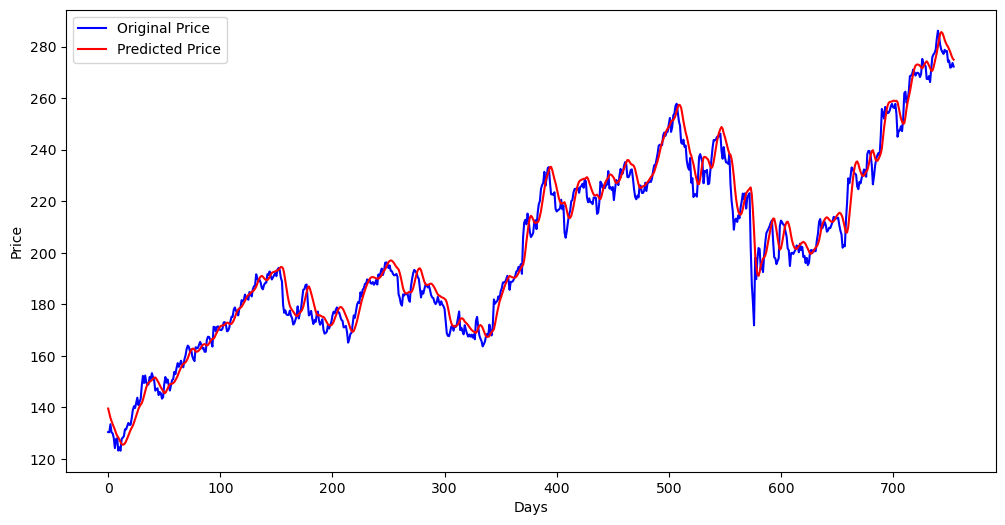

In [59]:
plt.figure(figsize=(12, 6))
plt.plot(y_test, 'b', label='Original Price')
plt.plot(y_predicted, 'r', label="Predicted Price")
plt.xlabel("Days")
plt.ylabel('Price')
plt.legend()

(140.0, 220.0)

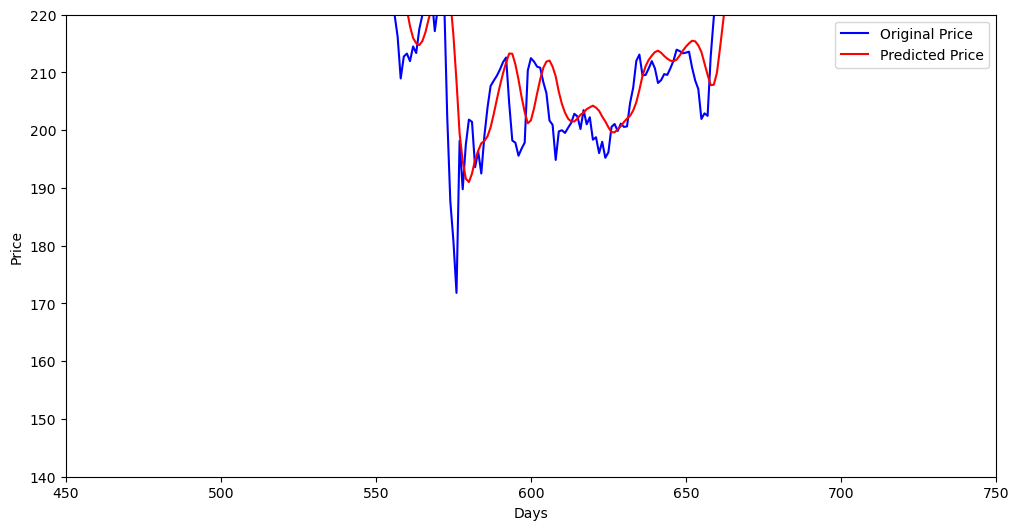

In [58]:
plt.figure(figsize=(12, 6))
plt.plot(y_test, 'b', label='Original Price')
plt.plot(y_predicted, 'r', label="Predicted Price")
plt.xlabel("Days")
plt.ylabel('Price')
plt.legend()
plt.xlim(450, 750)
plt.ylim(140, 220)

# 10. Model Evaluation

In [65]:
# Mean Squared Error (MSE)
from sklearn.metrics import mean_squared_error, r2_score

In [66]:
mse = mean_squared_error(y_test, y_predicted)
print(f"Mean Squarred Error (MSE): {mse}")

Mean Squarred Error (MSE): 31.994861864006158


In [67]:
baseline_mse = np.mean((y_test - y_test.mean())**2)
print(f"Baseline MSE: {baseline_mse}")

Baseline MSE: 1200.6827645555004


In [68]:
# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print(f"Root Mean Squarred Error (MSE): {rmse}")

Root Mean Squarred Error (MSE): 5.656400079910027


In [70]:
# R-Squared
r2 = r2_score(y_test, y_predicted)
print(f"R-Squared: {r2}")

R-Squared: 0.9733527765963637
